# Granger Causality Test :

`The Granger Causality test helps to determine which features are important in the multivariate time series model in order to 
predict the output. Basically it is a statistical hypothesis test which is helpful to determine if one time series is useful
to forecast the another`

`Granger Causality test runs a statistical test to check whether the lagged value of X (input variable) causes Y ( forecasted variable ). For Example.  when you realised that the temp. is higher then you turned on the AC so there is a lag in between!!`

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import plotly.express as px

from sklearn.ensemble import IsolationForest

mat.rcParams['figure.figsize'] = (10,8)
mat.rcParams['axes.grid'] = False

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/appliance_energy_usage.csv')
df

,date,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
0,1/11/2016 17:00,60,30,6.600000,733.5,92.000000,7.000000,5.300000,63.000000
1,1/11/2016 17:10,60,30,6.483333,733.6,92.000000,6.666667,5.200000,59.166667
2,1/11/2016 17:20,50,30,6.366667,733.7,92.000000,6.333333,5.100000,55.333333
3,1/11/2016 17:30,50,40,6.250000,733.8,92.000000,6.000000,5.000000,51.500000
4,1/11/2016 17:40,60,40,6.133333,733.9,92.000000,5.666667,4.900000,47.666667
...,...,...,...,...,...,...,...,...,...
19730,5/27/2016 17:20,100,0,22.733333,755.2,55.666667,3.333333,13.333333,23.666667
19731,5/27/2016 17:30,90,0,22.600000,755.2,56.000000,3.500000,13.300000,24.500000
19732,5/27/2016 17:40,270,10,22.466667,755.2,56.333333,3.666667,13.266667,25.333333
19733,5/27/2016 17:50,420,10,22.333333,755.2,56.666667,3.833333,13.233333,26.166667


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T_out        19735 non-null  float64
 4   Press_mm_hg  19735 non-null  float64
 5   RH_out       19735 non-null  float64
 6   Windspeed    19735 non-null  float64
 7   Tdewpoint    19735 non-null  float64
 8   Visibility   19735 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.4+ MB


In [7]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [8]:
df.head()

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,60,30,6.600000,733.5,92.0,7.000000,5.3,63.000000
2016-01-11 17:10:00,60,30,6.483333,733.6,92.0,6.666667,5.2,59.166667
2016-01-11 17:20:00,50,30,6.366667,733.7,92.0,6.333333,5.1,55.333333
2016-01-11 17:30:00,50,40,6.250000,733.8,92.0,6.000000,5.0,51.500000
2016-01-11 17:40:00,60,40,6.133333,733.9,92.0,5.666667,4.9,47.666667


In [10]:
features = list(df.select_dtypes(include=[np.number]).columns.values)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T_out        19735 non-null  float64
 3   Press_mm_hg  19735 non-null  float64
 4   RH_out       19735 non-null  float64
 5   Windspeed    19735 non-null  float64
 6   Tdewpoint    19735 non-null  float64
 7   Visibility   19735 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.4 MB


In [13]:
features = [i for i in df.columns if df[i].dtype != 'O']

In [11]:
features

['Appliances',
 'lights',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Tdewpoint',
 'Visibility']

In [14]:
features

['Appliances',
 'lights',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Tdewpoint',
 'Visibility']

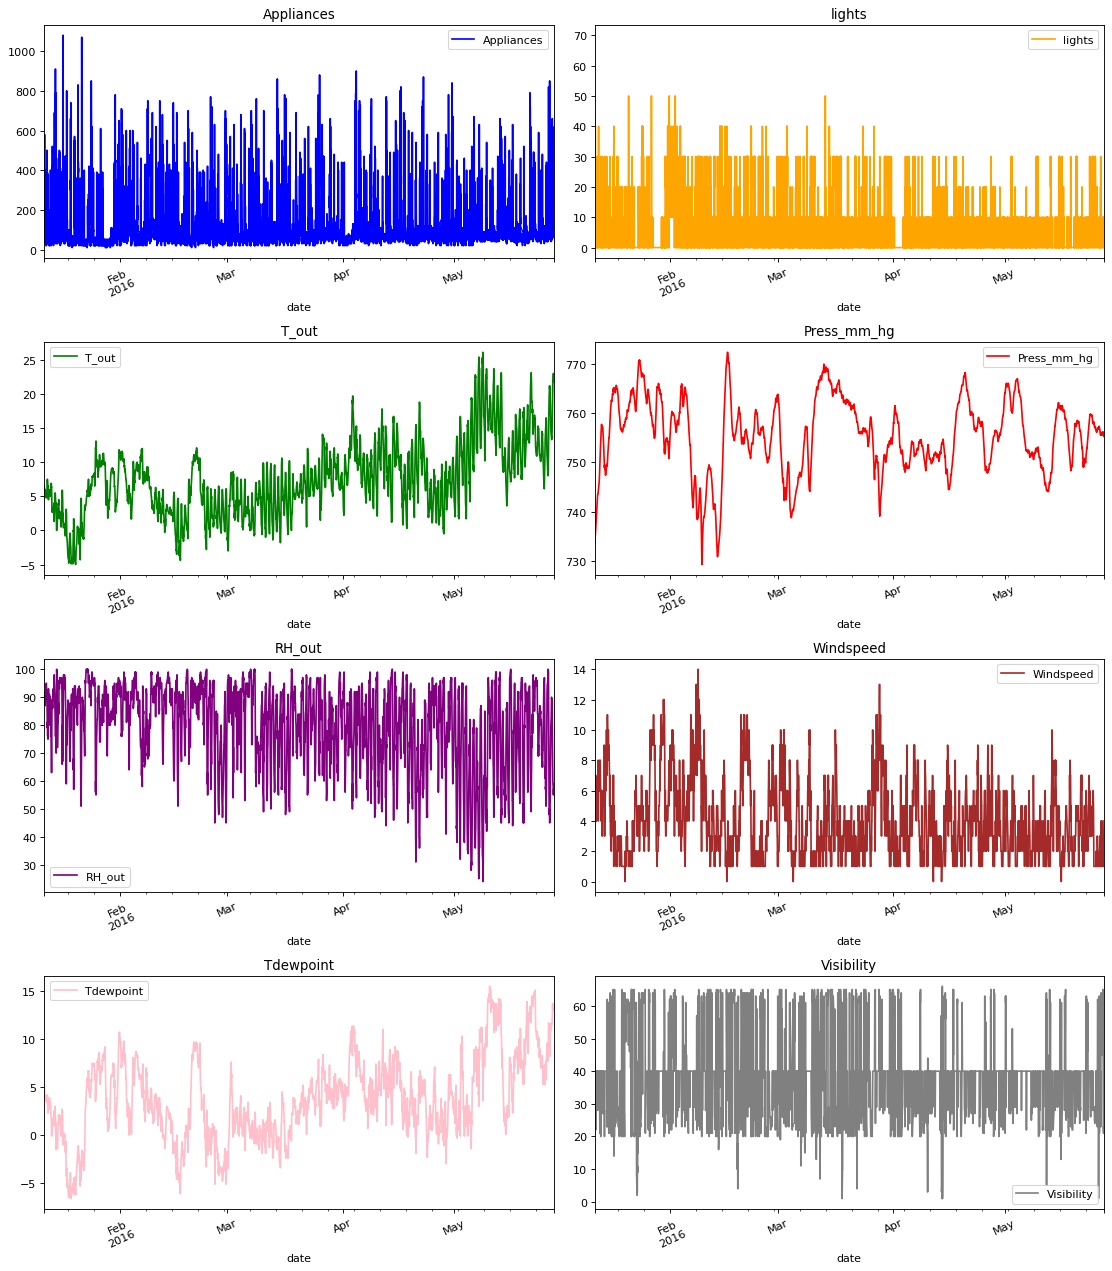

In [18]:
color_list = [
    "blue",
    'orange',
    'green',
    'red',
    'purple',
    'brown',
    'pink',
    'gray',
    'olive',
    'cyan',
]

def Visualize(data):
    features = [i for i in df.columns if df[i].dtype != 'O']
    feature_size = len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor='w', edgecolor='k'
    )
    
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
                ax=axes[i//2, i%2],
                color=c,
                title="{}".format(key),
                rot=25,
        )
        ax.legend([key])
    plt.tight_layout()
    
Visualize(df)   
    

In [21]:
df[['Appliances', 'T_out', 'lights']].corr(method='spearman')

,Appliances,T_out,lights
Appliances,1.000000,0.215504,0.302420
T_out,0.215504,1.000000,-0.072943
lights,0.302420,-0.072943,1.000000


In [31]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

# Null Hypothesis : Series possesses a unit root and hence is not stationary
# Alternate Hypothesis : Series is stationary

In [36]:
result = adfuller(df['T_out'])
print('Test Statistics : ', result[0])
print('p-value : ', result[1])
print('Critical value : ', result[4])

Test Statistics :  -7.376706875075917
p-value :  8.684210164021603e-11
Critical value :  {'1%': -3.430682172927125, '5%': -2.8616868086315823, '10%': -2.5668481422453397}


In [37]:
if result[1] > 0.05:
    print('Series is non-stationary (Accept null hypothesis)')
else:
    print('Series is Stationary')

Series is Stationary


### Now since the data is stationary so now we can pass it to the granger test

# Hypothesis for the granger test

    Null Hypothesis : Xt does not causes Yt
    Alternate Hypothesis : Xt causes Yt

In [38]:
max_lags = 4
results = grangercausalitytests(df[['Appliances', 'T_out']], max_lags, verbose=False)
results

{1: ({'ssr_ftest': (25.449752439117123, 4.5808497276304875e-07, 19731.0, 1),
   'ssr_chi2test': (25.45362194686216, 4.531461168078712e-07, 1),
   'lrtest': (25.437220550869824, 4.570149887657645e-07, 1),
   'params_ftest': (25.449752439117514, 4.5808497276183956e-07, 19731.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (20.2452199516199, 1.646733290549429e-09, 19728.0, 2),
   'ssr_chi2test': (40.50070207880327, 1.6046646557831108e-09, 2),
   'lrtest': (40.45919632949517, 1.6383140130210096e-09, 2),
   'params_ftest': (20.245219951621607, 1.646733290547001e-09, 19728.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (12.038645321012911, 7.188925512588724e-08, 19725.0, 3),
   'ssr_chi2test': (36.12875277174552, 7.033392227840277e-08, 3),
   'lrtest': (36.095717710326426, 7.147428964923197e-08, 3),
   'params_ftest': (12.038645320969295, 7.188925513050006e-08, 19725.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0.

In [41]:
p_values = [round(results[i+1][0]['ssr_ftest'][1], 4) for i in range(max_lags)] # taking the ssr_ftest 
p_values

[0.0, 0.0, 0.0, 0.0]

## So we conclude that the T_out variable causes Y (Appliances variable)

#### Now lets do the same for the another variable

In [42]:
results = grangercausalitytests(df[['lights', 'T_out']], max_lags, verbose=False)
p_values = [round(results[i+1][0]['ssr_ftest'][1], 4) for i in range(max_lags)] # taking the ssr_ftest 
p_values

[0.0012, 0.0221, 0.0713, 0.1423]

## So we conclude that in this ...upto 3 lags it causes Y (appliance variable)...beyond that its not

# NOTE : the 2nd parameter is always the independent variable 

In [44]:
results = grangercausalitytests(df[['Appliances', 'Visibility']], max_lags, verbose=False)
p_values = [round(results[i+1][0]['ssr_ftest'][1], 4) for i in range(max_lags)] # taking the ssr_ftest 
p_values

[0.822, 0.8877, 0.9698, 0.705]

### Visibility does not causes spike to Y ... so we can remove that

In [46]:
# Just testing by interchanging the parameters
results = grangercausalitytests(df[['T_out', 'Appliances']], max_lags, verbose=False)
p_values = [round(results[i+1][0]['ssr_ftest'][1], 4) for i in range(max_lags)] # taking the ssr_ftest 
p_values

[0.0, 0.4234, 0.3364, 0.4985]

# 2 important things that needs to be true : 

1. The cause happens prior to the effect
2. The cause has unique information about the future value of the effect